In [3]:
from os.path import exists

mjjaso_path = '/work/kajiyama/cnn/input/pr/thailand/5x5/pr_5x5_coarse_std_MJJASO_thailand.npy'

path_list = [mjjaso_path]
for i in path_list:
    print(exists(i))

True


In [4]:
import numpy as np

mjjaso_thailand = np.load(mjjaso_path) #mjjaso[42, 165, 4, 4]

In [6]:
print(mjjaso_thailand.shape)

(42, 165, 4, 4)


In [5]:
import bisect

def EFD(data, class_num):
    out = data.copy() # data=(6930)
    out_sorted = np.sort(out)
    if len(data)%class_num != 0:
        print('class_num is wrong')
    else:
        batch_sample = int(len(data)/class_num)
    
    out_bnd = [out_sorted[i] for i in range(0, len(out_sorted), batch_sample)]
    out_class = np.empty(len(out_sorted))
    for i, value in enumerate(out):
        label = bisect.bisect(out_bnd, value) # giving label number
        out_class[i] = int(label - 1)
    
    out_bnd.append(out_sorted[-1])
    out_bnd = np.array(out_bnd)
    out_bnds = np.empty((len(out_bnd) - 1, 2))
    for i in range(len(out_bnds)):
        out_bnds[i, 0] = out_bnd[i]
        out_bnds[i, 1] = out_bnd[i + 1]
    return out_class, out_bnds # out_class=(6930), out_bnds=(class_num+1,2)

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs

def show_std(image):
    bounds = [-1.5, -0.5, -0.2, 0.2,  0.5, 1.5]
    cmap = plt.cm.get_cmap('BrBG', 5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ticks = [-1.5, -1, -0.5, -0.35, -0.2, 0, 0.2, 0.35, 0.5, 1, 1.5]
    
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-90,-70, 5, 25) #location=(n5-25, e90-110)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(image,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     norm=norm,
                     cmap=cmap)
    cbar = fig.colorbar(mat,
                        ax=ax,
                        extend='both',
                        ticks=ticks,
                        spacing='proportional',
                        orientation='vertical')
    cbar.ax.set_yticklabels(['-1.5', 'low', '-0.5', 'mid-low', '-0.2', 
                             'normal', 
                             '0.2', 'mid-high', '0.5', 'high', '1.5'])

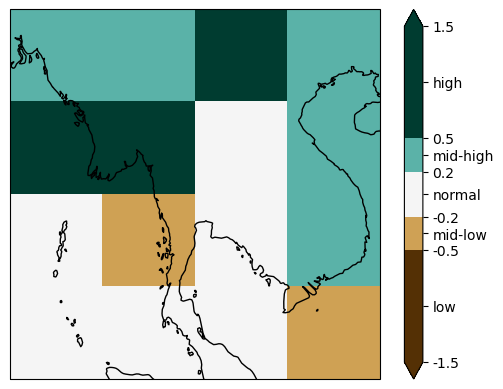

In [98]:
show_std(mjjaso_thailand[0, 0, :, :])